In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load the Excel file
file_path = '../data/CHD_githubDataset.csv'
df = pd.read_csv(file_path, delimiter=';')

In [3]:
X = df.drop('CHD', axis=1)
y = df.CHD
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [4]:
from sklearn.pipeline import make_pipeline
from tpot.builtins import ZeroCount
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    ZeroCount(),
    MaxAbsScaler(),
    KNeighborsClassifier(n_neighbors=55, p=2, weights="uniform")
)

# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

/home/selun/Dokumente/Sync_Office/00_git/machine-learning-cheatsheet/.venv/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


ExactExplainer explainer: 117it [01:52,  1.03s/it]                         


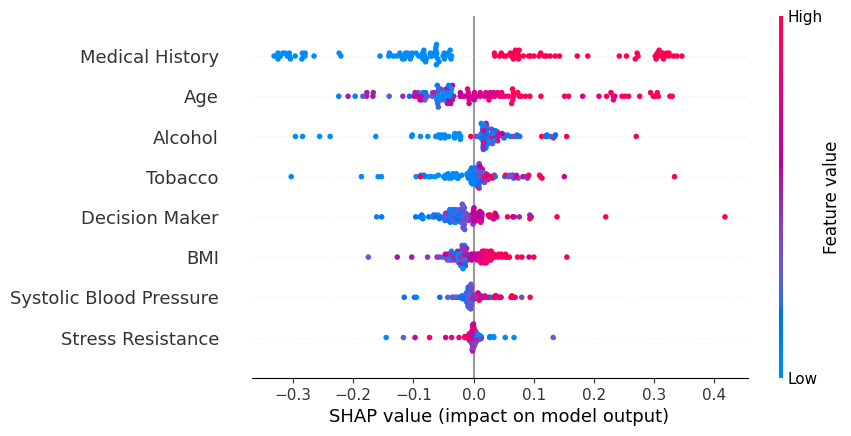

In [5]:
# SHAP
import shap

explainer = shap.Explainer(exported_pipeline.predict, training_features)
shap_values = explainer(testing_features)

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)

[16:24:09] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


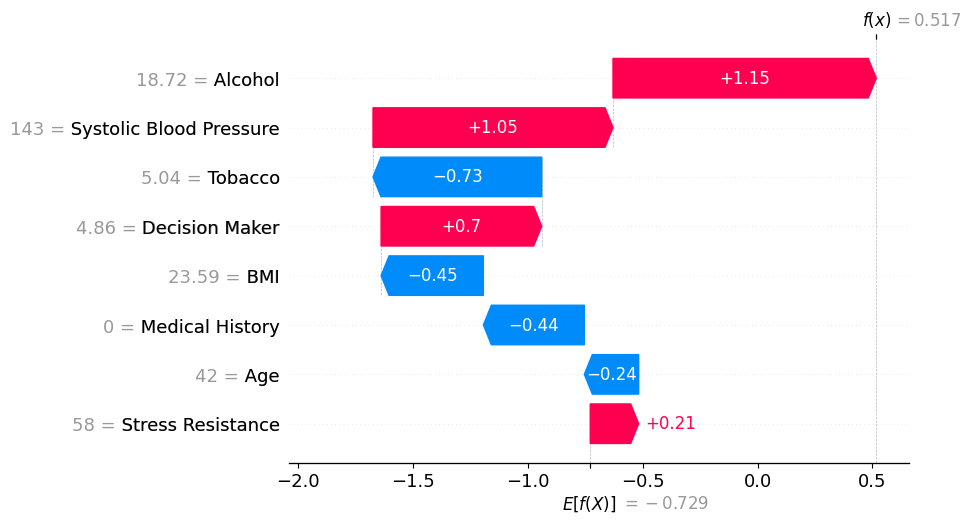

In [11]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(training_features.values, training_target.values)


expl = shap.TreeExplainer(model)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])
